In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
path = r"C:\Users\hp\Desktop\student_perf\student-mat-clean.csv"
df = pd.read_csv(path, sep=";")

df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Success,G_avg
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,0,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,0,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,1,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,1,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,1,8.666667


In [ ]:
#etape 1 Nous avons choisi des variables représentant le profil académique de l’étudiant afin de garantir un clustering pertinent.
features = ['age', 'studytime', 'absences', 'G1', 'G2']
X = df[features]

X.describe()


,age,studytime,absences,G1,G2
count,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.035443,5.708861,10.908861,10.713924
std,1.276043,0.839240,8.003096,3.319195,3.761505
min,15.000000,1.000000,0.000000,3.000000,0.000000
25%,16.000000,1.000000,0.000000,8.000000,9.000000
50%,17.000000,2.000000,4.000000,11.000000,11.000000
75%,18.000000,2.000000,8.000000,13.000000,13.000000
max,22.000000,4.000000,75.000000,19.000000,19.000000


In [ ]:
# Étape 2 : Normalisation
scaler = StandardScaler()
# standardscaller applique la stadarisation ;fit_transform calcul la moyenne avec lecartype de chaque ariable
X_scaled = scaler.fit_transform(X)
# Les données ont été normalisées pour éviter qu’une variable domine les autres.


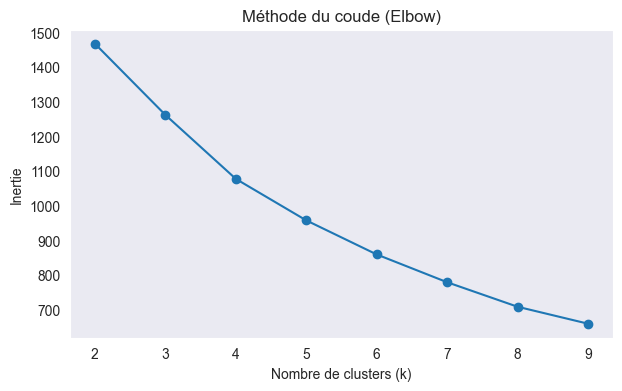

In [ ]:
# etape 3 : Choix du nombre de clusters
#Methode de coude
inertia = []

K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K, inertia, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.title("Méthode du coude (Elbow)")
plt.grid()
plt.show()
# La methode du coude est une technique pour choisir le nombre optimal de clusters (k) quand on utilise K-Means.
#La methode du coude permet de trouver un compromis entre complexite et qualite du clustering.

# La méthode du coude sert à trouver un compromis entre :

# La qualité du regroupement (clusters bien homogènes)

# La complexité du modèle (nombre de clusters raisonnable)
# Inertie=somme des distances au carreˊ entre chaque point et le centroı¨de de son cluster
# Le score de silhouette mesure la qualité de séparation entre les clusters.



#la courbe diminue de k=2 jusqu a k=9
#plus que k augmente linertie devienne trop petit
#2-3 forte baisse

In [ ]:
#Le Silhouette Score mesure :
#a quel point les points sont proches de leur cluster
#et éloignés des autres clusters

for k in range(2, 7):
    #celle ligne lance une bouclle pour tester diffirents nbr de cluster
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k} → Silhouette Score = {score:.3f}")
# le resultat moontre que le meilleur score est pour k=2 
#k=3 et k=4 sont tres proches
#apartie de k>5 le score dminue

k=2 → Silhouette Score = 0.240
k=3 → Silhouette Score = 0.231
k=4 → Silhouette Score = 0.234
k=5 → Silhouette Score = 0.216
k=6 → Silhouette Score = 0.218


In [ ]:
k = 3  # à ajuster selon les résultats précédents

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

df[['Cluster']].value_counts()
# On cree une nouvelle colonne dans ton DataFrame df appelee 'Cluster' qui contient le numero du cluster pour chaque ligne (0, 1 ou 2 ici).

#Le cluster 0 contient 173 points.
#Le cluster 1 contient 165 points.
#Le cluster 2 contient 57 points.

Cluster
0          173
1          165
2           57
Name: count, dtype: int64

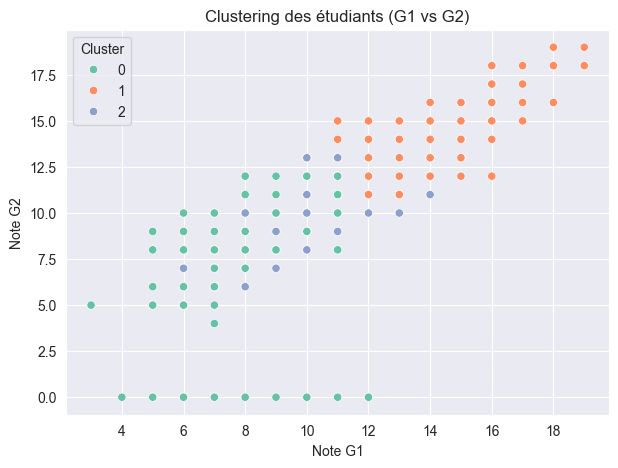

In [8]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df['G1'],
    y=df['G2'],
    hue=df['Cluster'],
    palette='Set2'
)

plt.title("Clustering des étudiants (G1 vs G2)")
plt.xlabel("Note G1")
plt.ylabel("Note G2")
plt.legend(title="Cluster")
plt.show()


In [9]:
cluster_profile = df.groupby('Cluster')[features].mean()
cluster_profile


,age,studytime,absences,G1,G2
Cluster,,,,,
0,16.641618,1.994220,2.942197,8.352601,8.005780
1,16.466667,2.200000,3.969697,13.969697,14.036364
2,17.526316,1.684211,19.140351,9.807018,9.315789


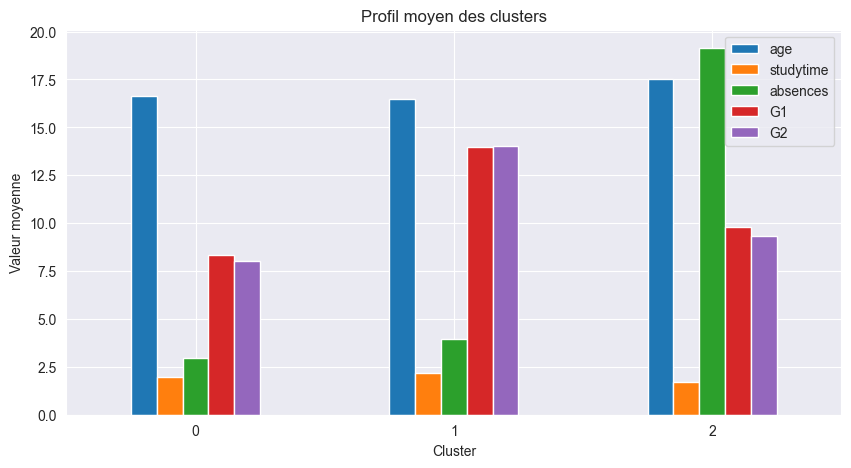

In [ ]:



cluster_profile.plot(kind='bar', figsize=(10,5))
plt.title("Profil moyen des clusters")
plt.ylabel("Valeur moyenne")
plt.xticks(rotation=0)
plt.show()


In [11]:
success_cluster = df.groupby('Cluster')['Success'].mean()
success_cluster


Cluster
0    0.421965
1    1.000000
2    0.473684
Name: Success, dtype: float64